In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Difdoug\Difdoug_NN_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.83630,NaN,2.46960,0.21541,3.09000,0.78343,NaN,0.03043,0.100660
1,0.029389,0.206580,NaN,1.43430,NaN,1.27780,1.42850,NaN,1.19480,NaN,0.98473,3.844500
2,-1.115400,0.217560,1.61050,1.33710,NaN,1.21000,3.99630,2.21730,3.90290,1.51440,2.43890,0.633580
3,-0.539160,-0.061874,0.36486,0.33278,0.19027,NaN,1.66010,2.35270,0.66126,3.13510,3.93810,3.734600
4,-0.268400,-1.006000,2.88220,1.56160,3.20140,3.37740,1.52260,0.98475,3.10940,3.65640,3.91720,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,3.70480,0.88269,0.35406,1.62780,3.29400,1.08500,0.15740,0.46504,2.851400
396,0.264630,NaN,3.90540,1.33770,1.41870,1.68610,1.09510,3.79360,0.12790,0.54249,3.36580,NaN
397,NaN,NaN,1.32480,1.77210,2.55090,1.47010,0.92540,1.84110,3.47730,0.95496,1.52630,2.123800
398,NaN,-0.411470,2.49480,0.39655,NaN,3.41010,2.95160,0.27800,0.99059,NaN,1.81620,0.087212


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	37
float64		column 2	36
float64		column 3	37
float64		column 4	24
float64		column 5	61
float64		column 6	24
float64		column 7	42
float64		column 8	43
float64		column 9	31
float64		column 10	24
float64		column 11	43
float64		column 12	36


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,363.000000,364.000000,363.000000,376.000000,339.000000,376.000000,358.000000,357.000000,369.000000,376.000000,357.000000,364.000000
mean,-0.106798,0.013424,2.026209,1.874878,1.880754,1.979011,2.047767,1.963854,1.965188,2.041279,1.955372,1.991245
std,2.450368,2.694567,1.095302,1.134393,1.108506,1.142180,1.115662,1.104214,1.114935,1.148562,1.136764,1.167317
min,-7.771000,-6.828400,0.005583,0.005376,0.000530,0.018503,0.016500,0.007321,0.007019,0.055837,0.006786,0.001972
25%,-0.646295,-0.791275,1.138600,0.943103,0.903455,1.028333,1.089175,1.109900,1.085000,1.053525,0.915350,0.998695
50%,-0.063939,0.015595,2.073400,1.770600,1.861000,2.021800,2.110600,1.951100,2.065300,2.088500,1.941700,1.992700
75%,0.685975,0.830307,2.889350,2.773675,2.791800,2.966250,2.943900,2.916300,2.895500,3.051075,2.914400,2.980200
max,8.409300,6.777100,3.951500,3.993400,3.979000,3.992300,3.996300,3.995000,3.985500,3.984300,3.938100,3.996000


<AxesSubplot:>

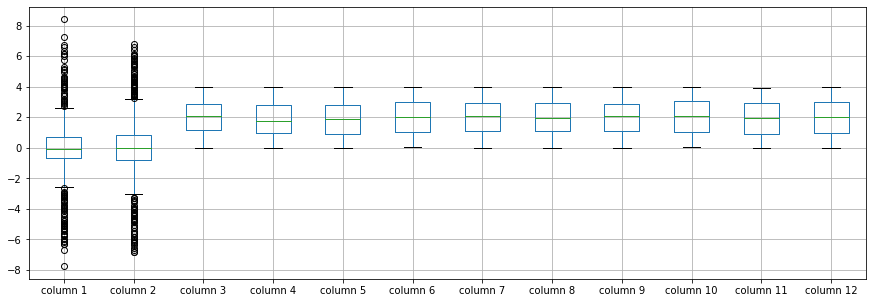

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    -0.106798
column 2     0.013424
column 3     2.026209
column 4     1.874878
column 5     1.880754
column 6     1.979011
column 7     2.047767
column 8     1.963854
column 9     1.965188
column 10    2.041279
column 11    1.955372
column 12    1.991245
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,0.044003,-0.023110,-0.058609,0.020122,-0.022415,-0.039041,0.084363,-0.006437,0.009293,0.065231,-0.032627
column 2,0.044003,1.000000,-0.059961,0.011823,-0.033822,-0.142623,0.045825,-0.011138,0.007270,0.028059,-0.012150,0.085397
column 3,-0.023110,-0.059961,1.000000,-0.028333,0.025369,-0.102574,-0.131100,0.068854,0.124962,-0.043704,-0.135169,-0.007480
column 4,-0.058609,0.011823,-0.028333,1.000000,0.016523,0.078014,0.023813,0.089212,-0.060715,0.079475,-0.023699,-0.046930
column 5,0.020122,-0.033822,0.025369,0.016523,1.000000,0.053689,-0.013545,0.001811,-0.001662,0.009563,0.058938,-0.036804
column 6,-0.022415,-0.142623,-0.102574,0.078014,0.053689,1.000000,0.004989,0.049828,0.006977,-0.009700,-0.013026,-0.053707
column 7,-0.039041,0.045825,-0.131100,0.023813,-0.013545,0.004989,1.000000,-0.038284,0.120588,0.031842,0.005578,-0.036659
column 8,0.084363,-0.011138,0.068854,0.089212,0.001811,0.049828,-0.038284,1.000000,0.006737,-0.136536,-0.058829,0.009562
column 9,-0.006437,0.007270,0.124962,-0.060715,-0.001662,0.006977,0.120588,0.006737,1.000000,0.009220,0.009906,0.063115
column 10,0.009293,0.028059,-0.043704,0.079475,0.009563,-0.009700,0.031842,-0.136536,0.009220,1.000000,-0.031948,-0.004043


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+18,12+18+18,12+18+18+18,12+18+18+18+18,12+18+18+18+18+18,12+18+18+18+18+18+18,12+18+18+18+18+18+18+18,12+18+18+18+18+18+18,12+18+18+18+18+18,12+18+18+18+18,12+18+18+18,12+18+18,12+18,12], vae_layer = False, seed = 18)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 25.053656768798827
Epoch: 1 , loss: 24.936100845336913
Epoch: 2 , loss: 24.90268013000488
Epoch: 3 , loss: 24.812063751220702
Epoch: 4 , loss: 24.797467727661132
Epoch: 5 , loss: 24.61262794494629
Epoch: 6 , loss: 24.23565269470215
Epoch: 7 , loss: 23.044573822021484
Epoch: 8 , loss: 21.279567413330078
Epoch: 9 , loss: 20.449736175537108
Epoch: 10 , loss: 20.184286651611327
Epoch: 11 , loss: 19.892978134155275
Epoch: 12 , loss: 19.685209579467774
Epoch: 13 , loss: 19.56102470397949
Epoch: 14 , loss: 19.507653579711913
Epoch: 15 , loss: 19.380751953125
Epoch: 16 , loss: 19.103235549926758
Epoch: 17 , loss: 19.004559631347657
Epoch: 18 , loss: 18.634722595214843
Epoch: 19 , loss: 18.85103515625
Epoch: 20 , loss: 18.642466316223146
Epoch: 21 , loss: 18.62933792114258
Epoch: 22 , loss: 18.28813720703125
Epoch: 23 , loss: 18.452795104980467
Epoch: 24 , loss: 18.713042221069337
Epoch: 25 , loss: 18.266429061

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(400, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    -0.705950
column 2     0.128930
column 3     1.058100
column 4     2.136200
column 5     2.148600
column 6     2.245800
column 7     3.727700
column 8     2.227200
column 9     1.943500
column 10    1.987000
column 11    2.470700
column 12    1.752699
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Difdoug.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.000000,0.000000,0.000000,0.0,-1.567672,0.000000,0.0,0.000000,0.0,0.902224,0.0,0.000000
1,0.000000,0.000000,0.356103,0.0,-2.324816,0.000000,0.0,0.677001,0.0,-1.284248,0.0,0.000000
2,0.000000,0.000000,0.000000,0.0,-3.125879,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
3,0.000000,0.000000,0.000000,0.0,0.000000,0.374812,0.0,0.000000,0.0,0.000000,0.0,0.000000
4,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
396,0.000000,6.117469,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,-2.154741
397,3.441496,1.997633,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
398,-7.340761,0.000000,0.000000,0.0,-2.237013,0.000000,0.0,0.000000,0.0,-2.625765,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(44.97871981102467, 163.27447192538312)

In [17]:
NRMS=numerator/denominator
NRMS


0.2754791932910373

In [18]:
new_df.iloc[66,:]

column 1     0.822720
column 2     0.267760
column 3     0.403430
column 4     1.187200
column 5     0.373127
column 6     2.583000
column 7     2.830600
column 8     3.074200
column 9     1.538100
column 10    0.384852
column 11    0.853340
column 12    3.604400
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.978900,1.83630,1.318928,2.469600,0.21541,3.090000,0.78343,1.412574,0.03043,0.100660
1,0.029389,0.206580,0.844713,1.43430,0.805084,1.277800,1.42850,0.820331,1.19480,0.847552,0.98473,3.844500
2,-1.115400,0.217560,1.610500,1.33710,0.642321,1.210000,3.99630,2.217300,3.90290,1.514400,2.43890,0.633580
3,-0.539160,-0.061874,0.364860,0.33278,0.190270,0.941972,1.66010,2.352700,0.66126,3.135100,3.93810,3.734600
4,-0.268400,-1.006000,2.882200,1.56160,3.201400,3.377400,1.52260,0.984750,3.10940,3.656400,3.91720,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.725800,3.70480,0.882690,0.354060,1.62780,3.294000,1.08500,0.157400,0.46504,2.851400
396,0.264630,0.009869,3.905400,1.33770,1.418700,1.686100,1.09510,3.793600,0.12790,0.542490,3.36580,1.600859
397,-0.037604,0.004333,1.324800,1.77210,2.550900,1.470100,0.92540,1.841100,3.47730,0.954960,1.52630,2.123800
398,-0.047761,-0.411470,2.494800,0.39655,0.761987,3.410100,2.95160,0.278000,0.99059,0.811635,1.81620,0.087212


In [21]:
imputations[-1].to_excel("Difdoug_NN_10(imp).xlsx", index=False, header=False)